# Happiness Datatset EDA and Prediction

## By Oby Ajah

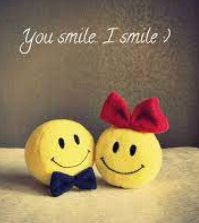

## Background

****
This dataset contains indices from different regions and countries as well as their happiness score and rank. Different indicators culminate to the happiness quotient of individuals. This dataset attempts to showcase different parameters that are used to adjuge happiness
****


### Objectives

1. To carry out exploratory data analysis on the dataset
2. To examine relationships between different variables in the dataset  
3. To predict happiness score using different variables from the dataset 

### Importing necessary libraries 

In [38]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle


### Loading the dataset

In [39]:

data = pd.read_csv('C:/Users/obyaj/.jupyter/world_happiness_2016.csv')
print(data.head())


       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                

#### This dataset has 13 columns 

In [40]:
data.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


### Understanding the dataset

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [42]:
data.shape

(157, 13)

#### This dataset contains 157 rows and 13 colums

In [43]:
#Get the percentage of missing values per column
data.isnull().sum()/data.shape[0] *100

Country                          0.0
Region                           0.0
Happiness Rank                   0.0
Happiness Score                  0.0
Lower Confidence Interval        0.0
Upper Confidence Interval        0.0
Economy (GDP per Capita)         0.0
Family                           0.0
Health (Life Expectancy)         0.0
Freedom                          0.0
Trust (Government Corruption)    0.0
Generosity                       0.0
Dystopia Residual                0.0
dtype: float64

## Exploratory Data Analysis



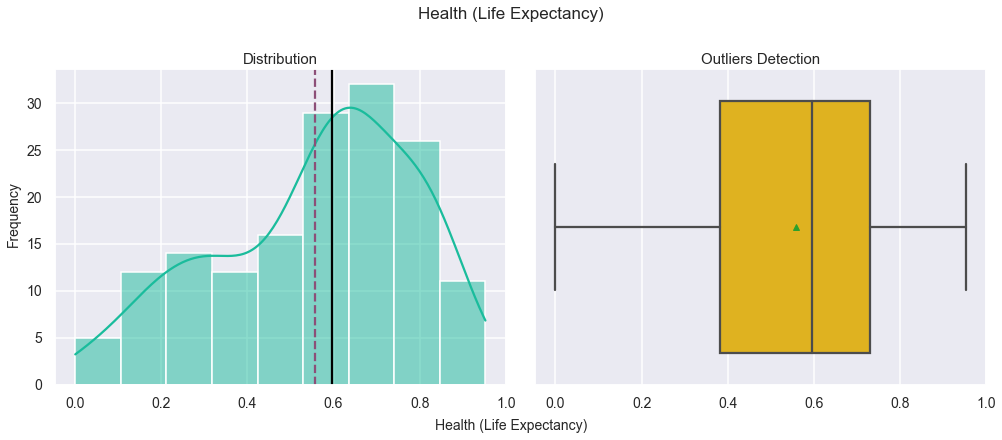

In [44]:
#Get life expectancy distribution among the countries
plt, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
plt.suptitle("Health (Life Expectancy)", fontsize=17)
plt.text(0.5, 0.0016, 'Health (Life Expectancy)', ha='center', fontsize=14)
plt.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(data, x='Health (Life Expectancy)', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(data['Health (Life Expectancy)']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(data['Health (Life Expectancy)']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=data['Health (Life Expectancy)'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers Detection",fontdict={'fontsize': fontsize})

plt.tight_layout()
plt.show()                  

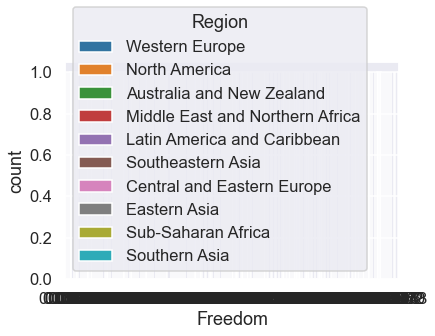

In [47]:

#Checking the quotient of freedom in each country
sns.countplot(data=data, x = 'Freedom' , hue = 'Region')
plt.show()           

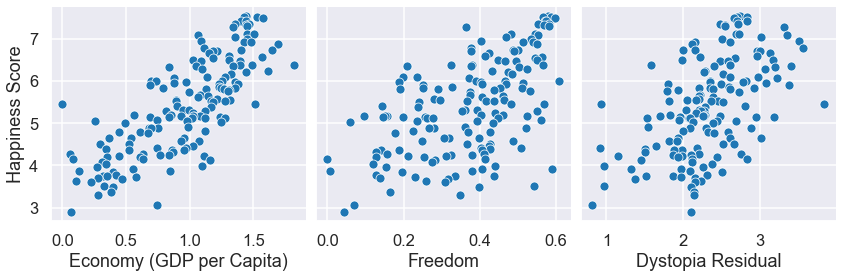

In [8]:
#Checking how key parameters affect happiness score
sns.pairplot(data, x_vars=['Economy (GDP per Capita)', 'Freedom', 'Dystopia Residual'], y_vars='Happiness Score', height=4)
plt.show()


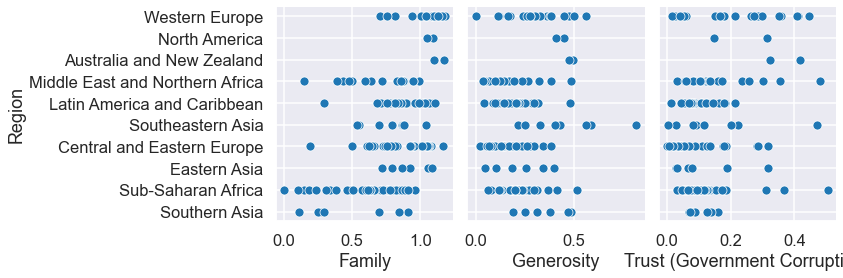

In [9]:
#Checking the  parameters across different region across countries

sns.pairplot(data, x_vars=['Family', 'Generosity', 'Trust (Government Corruption)'], y_vars='Region', height=4)
plt.show()


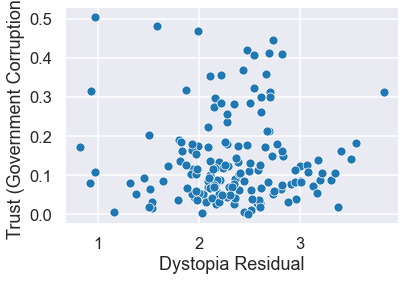

In [10]:
#Checking the connection between dystopia, govt corruption
sns.scatterplot(data=data, x="Dystopia Residual", y="Trust (Government Corruption)")
plt.show()

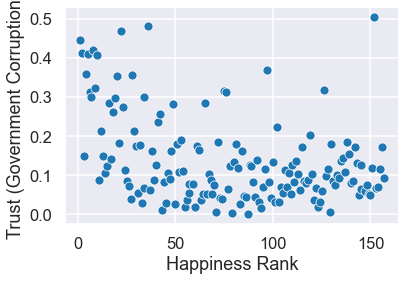

In [11]:
#Checking the connection between dystopia, govt corruption
sns.scatterplot(data=data, x="Happiness Rank", y="Trust (Government Corruption)")
plt.show()

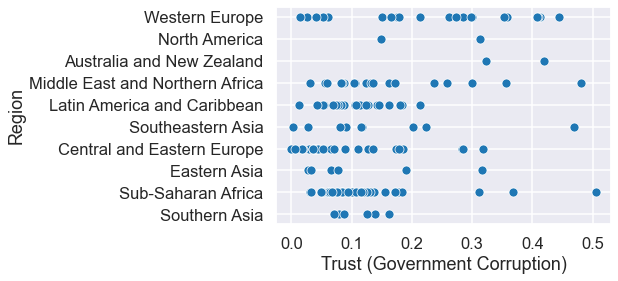

In [12]:
#Checking the connection between dystopia, govt corruption
sns.scatterplot(data=data, x="Trust (Government Corruption)", y="Region")
plt.show()

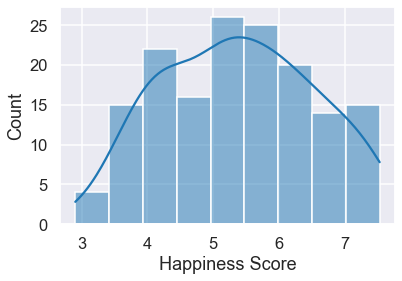

In [13]:
#Checking the distribution of happiness score
sns.histplot(data['Happiness Score'], kde=True)
plt.show()


## Data Preprocessing

In [33]:
#Dropping missing data
data = data.dropna()


In [34]:
#Defining feature and target variable
X = data[['Trust (Government Corruption)', 'Health (Life Expectancy)', 'Dystopia Residual', 'Generosity', 'Freedom']]
y = data['Happiness Score']


In [16]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training

In [17]:
#Training my liner regreession model
# Instantiate and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.1343086792224759
R^2 Score: 0.901810031785619


#### The model has 90.2% prediction accuracy rate

## Feature Engineering for Model Improvement

In [18]:
#improve my model, using feature engineering
X = data[['Trust (Government Corruption)','Health (Life Expectancy)', 'Family', 'Dystopia Residual', 'Generosity', 'Freedom']]
y = data['Happiness Score']

In [19]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
#Training my liner regreession model
# Instantiate and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.028453697511424757
R^2 Score: 0.979198160011681


#### After an enhanced feature engineering, the model was able to make a 97.9% prediction accuracy rate 

In [21]:
!pip install streamlit


In [22]:
#Importing library for saving my model
import pickle


In [23]:
#Saving my model with pickle
with open("linear_regression_model.pkl", "wb") as file:
    pickle.dump(model, file)


In [24]:
#Loading model in streamlit
with open("linear_regression_model.pkl", "rb") as file:
    model = pickle.load(file)


#### The model has been saved and can be delployed on streamlit and used online for data predictions